# DATA COLLECTION

In [ ]:
!pip install --upgrade pip

In [ ]:
!pip3 install twint
!pip install tweepy
!pip install -U textblob
!pip install emoji --upgrade
!pip install --upgrade pip
!pip install wordcloud
!pip install nest_asyncio

In [5]:
import nest_asyncio
nest_asyncio.apply()
import pandas as pd
import tweepy
import json
import random
import os
from tqdm import tqdm, notebook
import numpy as np

In [217]:
#APPLY FOR TWITTER API AND USE YOUR KEY AND TOKENS BELOW
#Part-1: Authorization and Search tweets
#Getting authorization
consumer_key = 'rPfvJDXbyaF0QXodea4s9VTxL'
consumer_secret = 'NmtGiNkbu4XioJdpj7avLA1u2ixbcIZaIb4Jr4D73MC4pDq7Jd'
access_token = '3979400294-6egzaaphx67tBd4zwwRqWSUh0OUmhQk95DMTWAY'
access_token_secret = 'LjHyacX8fMiH4VIl8j0Ot0YStASkf89E2MraZg0sAZegv'
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth, wait_on_rate_limit=True)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\athoi\anaconda3\lib\site-packages\tweepy\auth.py:120: DeprecationWarning: OAuthHandler is deprecated; use OAuth1UserHandler instead.
  warnings.warn(


In [221]:
search_words = "FashionNova-filter:retweets"
date_since = "2022-07-27"

#Collect tweets
tweets = tweepy.Cursor(api.search_tweets,
              q=search_words,
              lang="en",
              since=date_since).items(2500)
#CHANGE THE ITEM(900) ABOVE TO THE NUMBER OF TWEETS THAT YOU WANT TO COLLECT 

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [222]:
tweets_text = []

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [223]:
tweets_copy = []
for tweet in tqdm(tweets):
     tweets_copy.append(tweet)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
0it [00:00, ?it/s]Unexpected parameter: since
1it [00:00,  2.52it/s]Unexpected parameter: since
15it [00:00, 22.27it/s]Unexpected parameter: since
30it [00:01, 30.76it/s]Unexpected parameter: since
43it [00:01, 33.12it/s]Unexpected parameter: since
53it [00:01, 32.88it/s]Unexpected parameter: since
65it [00:02, 34.88it/s]Unexpected parameter: since
73it [00:02, 31.41it/s]Unexpected parameter: since
88it [00:02, 35.38it/s]Unexpected parameter: since
103it [00:03, 38.29it/s]Unexpected parameter: since
118it [00:03, 39.26it/s]Unexpected parameter: since
133it [00:03, 40.87it/s]Unexpected parameter: since
145it [00:04, 38.43it/s]Unexpecte

In [224]:
tweets_df = pd.DataFrame()
for tweet in tqdm(tweets_copy):
    hashtags = []
    try:
        for hashtag in tweet.entities["hashtags"]:
            hashtags.append(hashtag["text"])
        text = api.get_status(id=tweet.id, tweet_mode='extended').full_text
    except:
        pass
    tweets_df = tweets_df.append(pd.DataFrame({'user_name': tweet.user.name, 
                                               'user_location': tweet.user.location,\
                                               'user_description': tweet.user.description,
                                               'user_created': tweet.user.created_at,
                                               'user_followers': tweet.user.followers_count,
                                               'user_friends': tweet.user.friends_count,
                                               'user_favourites': tweet.user.favourites_count,
                                               'user_verified': tweet.user.verified,
                                               'date': tweet.created_at,
                                               'text': text, 
                                               'hashtags': [hashtags if hashtags else None],
                                               'source': tweet.source,
                                               'is_retweet': tweet.retweeted}, index=[0]))

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 190/190 [00:53<00:00,  3.56it/s]


In [226]:
tweets_df.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_name,user_location,user_description,user_created,user_followers,user_friends,user_favourites,user_verified,date,text,hashtags,source,is_retweet
0,Cyber_C0ven,"Chicago, IL","Thrift Shopping, Poshmark, sustainable fashion...",2020-05-22 02:25:47+00:00,21,23,7,False,2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,"[poshmark, fashion, style, shopmycloset]",Poshmark,False
0,jea.,,PHL | NYC 📍\nModel 📸| Designer @jeagfx | NU\nC...,2013-10-15 22:31:06+00:00,1711,1506,15528,False,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,None,Twitter Web App,False
0,Aloha hearts,,Shop my Poshmark closet @alohaintheheart,2022-05-04 10:40:17+00:00,11,36,2,False,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,"[poshmark, fashion, style, shopmycloset]",Poshmark,False
0,Dazz Deals,United States,Are you always scrambling around trying to fin...,2021-04-02 07:58:59+00:00,64,73,6,False,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,[FashionNova],Twitter Web App,False
0,BlackManson,,,2022-07-18 22:59:29+00:00,3,27,51,False,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,None,Twitter for iPhone,False


In [227]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

all tweets: (190, 13)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [229]:
tweets_df.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_name', 'user_location', 'user_description', 'user_created',
       'user_followers', 'user_friends', 'user_favourites', 'user_verified',
       'date', 'text', 'hashtags', 'source', 'is_retweet'],
      dtype='object')

In [230]:
tweets=tweets_df.drop(['user_friends', 'user_name','user_description','user_followers','user_favourites','user_friends', 'hashtags', 'source','user_verified','user_created',], axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [231]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet
0,"Chicago, IL",2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,False
0,,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False
0,,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False
0,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False
0,,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False


In [232]:
tweets.tail()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet
0,,2022-07-27 00:30:35+00:00,Fresh As A Mint 💯\n\nhttps://t.co/3PbFeAO4CA h...,False
0,,2022-07-27 00:28:32+00:00,So good I had to share! Check out all the item...,False
0,,2022-07-27 00:28:12+00:00,So good I had to share! Check out all the item...,False
0,,2022-07-27 00:27:06+00:00,ARI✨ @therealkylesister Loading...\nALL GLASS ...,False
0,,2022-07-27 00:17:46+00:00,@FashionNova i just got outta jail😔,False


In [233]:
tweets_df.drop_duplicates(subset = ["user_name", "date", "text"], inplace=True)
print(f"all tweets: {tweets_df.shape}")

all tweets: (190, 13)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [234]:
tweets['text'].nunique()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


190

In [235]:
# load library
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

# download the set of stop words the first time
import nltk
nltk.download('stopwords')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\athoi\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [236]:
# Load stop words
stop_words = stopwords.words('english')

# Show stop words
stop_words[:10]

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're"]

In [237]:
#Cleaning Tweets
import re 
from textblob import TextBlob 
import emoji  

def clean_tweet(text): 
    text = re.sub(r'@[A-Za-z0-9]+', '', str(text)) # remove @mentions
    text = re.sub(r'#', '',  str(text)) # remove the '#' symbol
    text = re.sub(r'RT[\s]+', '',  str(text)) # remove RT
    text = re.sub(r'https?\/\/S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'http\S+', '',  str(text)) # remove the hyperlink
    text = re.sub(r'www\S+', '',  str(text)) # remove the www
    text = re.sub(r'twitter+', '',  str(text)) # remove the twiiter
    text = re.sub(r'pic+', '',  str(text)) # remove the pic
    text = re.sub(r'com', '',  str(text)) # remove the pic

    return text

def remove_emoji(text):
    return emoji.get_emoji_regexp().sub(u'', text)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [238]:
tweets['cleaned_text']=tweets['text'].apply(clean_tweet)
tweets['cleaned_text']=tweets['cleaned_text'].apply(remove_emoji)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-237-97d422f0bdb6>:20: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'emoji~=1.6.3'
  return emoji.get_emoji_regexp().sub(u'', text)
<ipython-input-237-97d422f0bdb6>:20: DeprecationWarning: 'emoji.get_emoji_regexp()' is deprecated and will be removed in version 2.0.0. If you want to remove emoji from a string, consider the method emoji.replace_emoji(str, replace='').
To hide this warning, pin/downgrade the package to 'e

In [240]:
# Remove stop words
tweets['cleaned_text']=tweets['cleaned_text'].apply(lambda words: ' '.join(word.lower() for word in words.split() if word not in stop_words))

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [241]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text
0,"Chicago, IL",2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...
0,,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False,fashionnova really first pany seen ig ads back...
0,,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...
0,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False,fashion nova coupon code - august 2022 please ...
0,,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False,bitch wear louis vuitton aint fashionnova


# DATA CLEANING

In [242]:
from wordcloud import WordCloud,ImageColorGenerator
from PIL import Image
import urllib
import requests
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


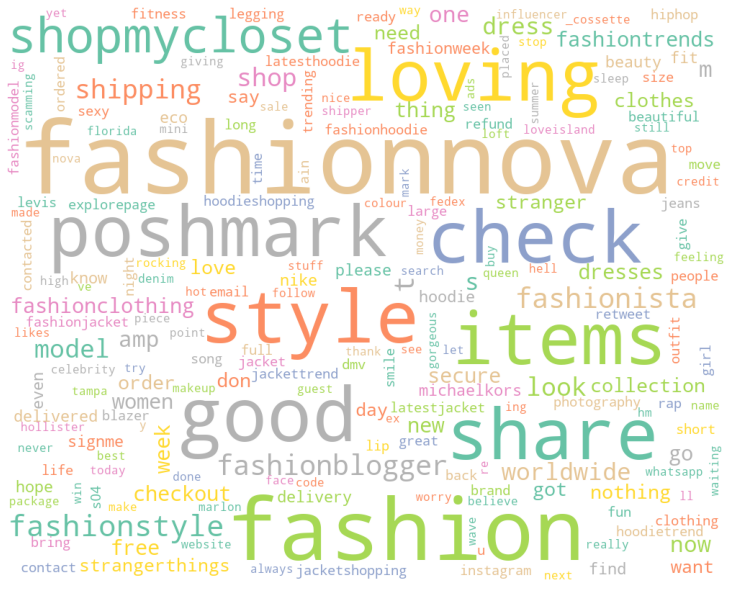

In [243]:
comment_words = '' 
stopwords = set(STOPWORDS) 
  
# iterate through the csv file 
for val in tweets.cleaned_text: 
      
    # typecaste each val to string 
    val = str(val) 
  
    # split the value 
    tokens = val.split() 
      
    # Converts each token into lowercase 
    for i in range(len(tokens)): 
        tokens[i] = tokens[i].lower() 
      
    comment_words += " ".join(tokens)+" "
  
wordcloud = WordCloud(width = 1000, height = 800, 
                background_color='white', colormap='Set2', 
                collocations=False, 
                stopwords = stopwords, 
                min_font_size = 12).generate(comment_words) 
  
# plot the WordCloud image                        
plt.figure(figsize = (10, 10), facecolor = None) 
plt.imshow(wordcloud) 
plt.axis("off") 
plt.tight_layout(pad = 0) 
  
plt.show() 

In [244]:
tweets.to_csv("DataOne.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [119]:
##Merge all the data scraped from every week
#Change the names of the CSV Files to the keywords you used for each search to make it easy for located your dataset

Tweets1 = pd.read_csv("DataOne.csv")
#Tweets2 = pd.read_csv("Name2.csv")
#Tweets3 = pd.read_csv("Name3.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [245]:
## merge all dataframes
df_list = [Tweets1]
df = pd.concat(df_list)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [246]:
df.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Unnamed: 0,user_location,date,text,is_retweet,cleaned_text
0,0,NaN,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False,fashionnova really first pany i seen ig ads ba...
1,0,NaN,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False,so good i share! check items i'm loving poshma...
2,0,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False,fashion nova coupon code - august 2022 please ...
3,0,NaN,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False,bitch wear louis vuitton aint fashionnova
4,0,Singapore,2022-07-28 02:04:45+00:00,your international shipping &amp; customer ser...,False,international shipping &amp; customer service ...


In [247]:
##Save your combined dataset

df.to_csv("Combined_Dataset.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [123]:
df=pd.read_csv("Combined_Dataset.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# Data Analysis

In [248]:
import pandas as pd
import numpy as np
import string
import re
import nltk
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [249]:
def getSubjectivity(text):
    return TextBlob( str(text)).sentiment.subjectivity

def getPolarity(text):
    return TextBlob( str(text)).sentiment.polarity

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [250]:
tweets.dropna(subset=['cleaned_text'], inplace = True)
tweets.reset_index(drop=True, inplace=True)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [251]:
tweets['Subjectivity'] = tweets['cleaned_text'].apply(getSubjectivity)
tweets['Polarity'] = tweets['cleaned_text'].apply(getPolarity)
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity
0,"Chicago, IL",2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775000,0.737500
1,,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False,fashionnova really first pany seen ig ads back...,0.344444,-0.216667
2,,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775000,0.737500
3,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False,fashion nova coupon code - august 2022 please ...,0.000000,0.000000
4,,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False,bitch wear louis vuitton aint fashionnova,0.000000,0.000000


In [252]:
# Create a function to compute negative (-1), neutral (0) and positive (+1) analysis
def get_Polarity_Analysis(score):
    if score < 0:
      return 'Negative'
    elif score == 0:
      return 'Neutral'
    else:
      return 'Positive'
def get_Subjectivity_Analysis(score):
    if score >  0:
      return 'Opinion'
    else:
      return 'Fact'

tweets['Analysis_Polarity'] = tweets['Polarity'].apply(get_Polarity_Analysis)

tweets['Analysis_Subjectivity'] = tweets['Subjectivity'].apply(get_Subjectivity_Analysis)

# Show the dataframe
tweets.head()



C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,"Chicago, IL",2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775000,0.737500,Positive,Opinion
1,,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False,fashionnova really first pany seen ig ads back...,0.344444,-0.216667,Negative,Opinion
2,,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775000,0.737500,Positive,Opinion
3,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False,fashion nova coupon code - august 2022 please ...,0.000000,0.000000,Neutral,Fact
4,,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False,bitch wear louis vuitton aint fashionnova,0.000000,0.000000,Neutral,Fact


In [253]:
tweets.to_csv("PolaritySubjectivityInnovation.csv")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [254]:
tweets.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 190 entries, 0 to 189
Data columns (total 9 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   user_location          190 non-null    object             
 1   date                   190 non-null    datetime64[ns, UTC]
 2   text                   190 non-null    object             
 3   is_retweet             190 non-null    bool               
 4   cleaned_text           190 non-null    object             
 5   Subjectivity           190 non-null    float64            
 6   Polarity               190 non-null    float64            
 7   Analysis_Polarity      190 non-null    object             
 8   Analysis_Subjectivity  190 non-null    object             
dtypes: bool(1), datetime64[ns, UTC](1), float64(2), object(5)
memory usage: 12.2+ KB


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


# SENTIMENT ANALYSIS

In [255]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
sns.set(font_scale=2)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


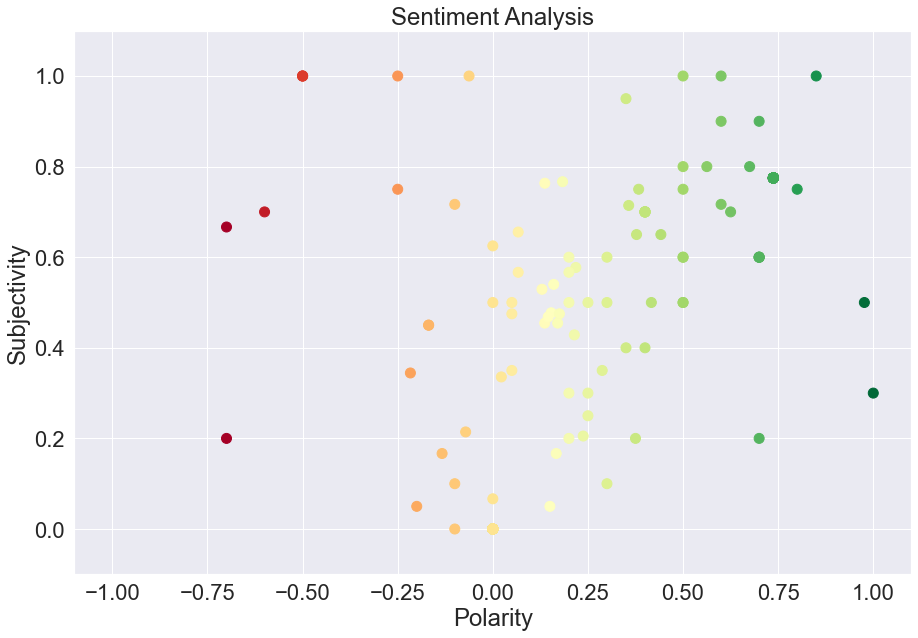

(None,)

In [256]:
plt.figure(figsize=(15,10)) 

# plt.style.use('seaborn-pastel')

plt.scatter(tweets['Polarity'], tweets['Subjectivity'], c=tweets['Polarity'], s=100, cmap='RdYlGn') 

plt.xlim(-1.1, 1.1)
plt.ylim(-0.1, 1.1) 
plt.title('Sentiment Analysis') 
plt.xlabel('Polarity') 
plt.ylabel('Subjectivity') 
plt.show(),

In [257]:
# Show the value counts
tweets['Analysis_Polarity'].value_counts()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Positive    127
Neutral      45
Negative     18
Name: Analysis_Polarity, dtype: int64

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


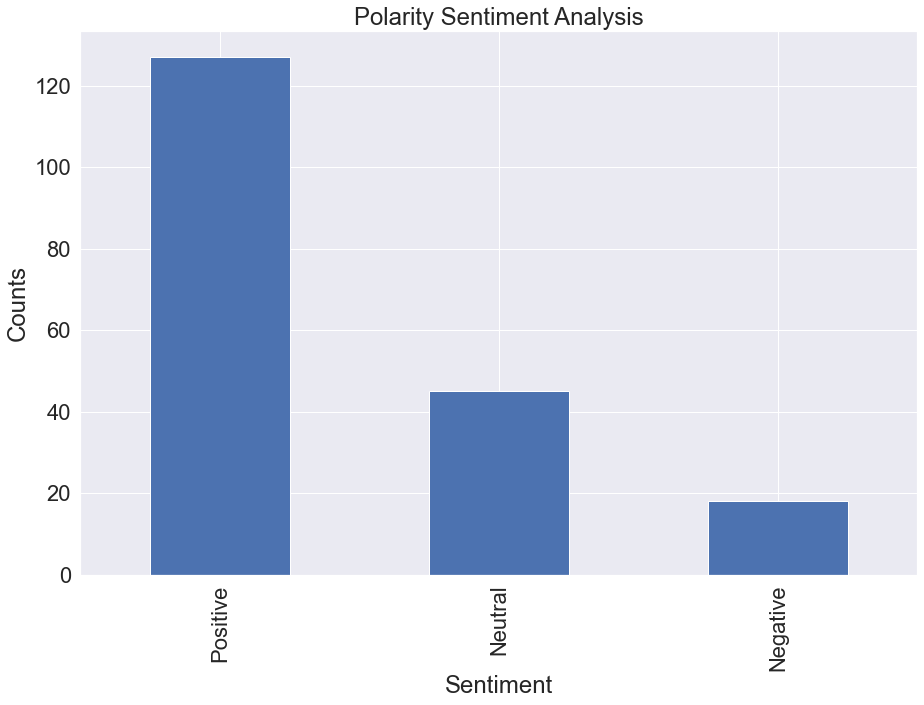

In [258]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Polarity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Polarity'].value_counts().plot(kind = 'bar')
plt.show()

# Sentiment Analysis Pie Chart

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


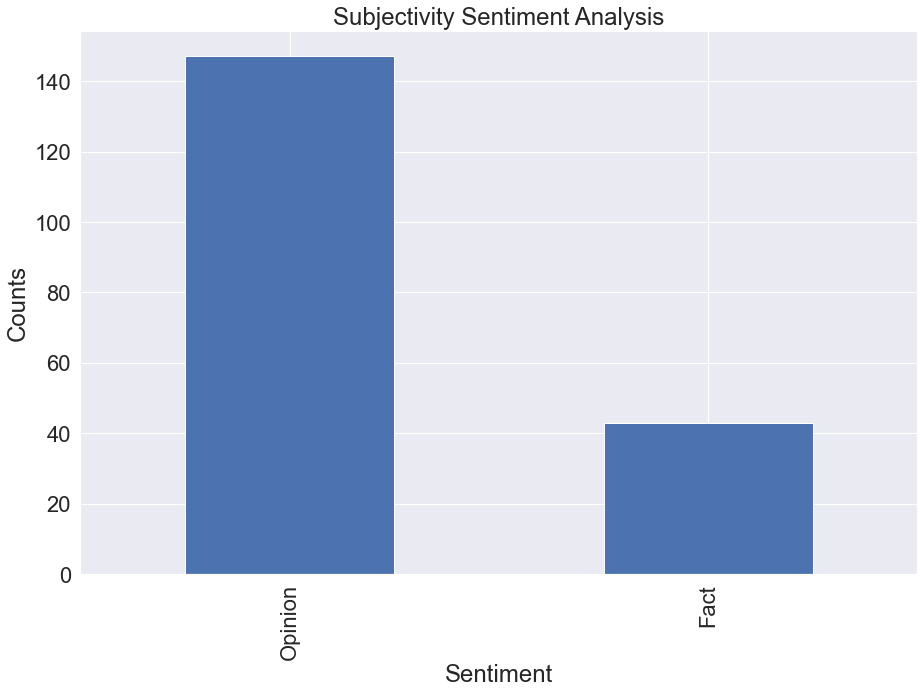

In [259]:
# Plotting and visualizing the counts
plt.figure(figsize=(15,10)) 

plt.title('Subjectivity Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
tweets['Analysis_Subjectivity'].value_counts().plot(kind = 'bar')
plt.show()

In [260]:
# Show the value counts
tweets['Analysis_Subjectivity'].value_counts()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Opinion    147
Fact        43
Name: Analysis_Subjectivity, dtype: int64

# TOPIC MODELING

In [ ]:
!pip install pyLDAvis

In [262]:
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
import pyLDAvis.sklearn
pyLDAvis.enable_notebook()


from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [263]:
tf_vectorizer = CountVectorizer(strip_accents = 'unicode',
                                stop_words = 'english',
                                lowercase = True,
                                token_pattern = r'\b[a-zA-Z]{3,}\b',
                                max_df = 0.5, 
                                min_df = 10)
dtm_tf = tf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tf.shape)

(190, 14)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [264]:
tfidf_vectorizer = TfidfVectorizer(**tf_vectorizer.get_params())
dtm_tfidf = tfidf_vectorizer.fit_transform(tweets['cleaned_text'].values.astype('U'))
print(dtm_tfidf.shape)

(190, 14)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
C:\Users\athoi\anaconda3\lib\site-packages\sklearn\feature_extraction\text.py:1805: UserWarning: Only (<class 'numpy.float64'>, <class 'numpy.float32'>, <class 'numpy.float16'>) 'dtype' should be used. <class 'numpy.int64'> 'dtype' will be converted to np.float64.
  warnings.warn("Only {} 'dtype' should be used. {} 'dtype' will "


In [265]:
# for TF DTM
lda_tf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tf.fit(dtm_tf)
# for TFIDF DTM
lda_tfidf = LatentDirichletAllocation(n_components =8, random_state=50)
lda_tfidf.fit(dtm_tfidf)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


LatentDirichletAllocation(n_components=8, random_state=50)

In [266]:
#for i,topic in enumerate(lda_tf.components_):
#print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-10:]])
#print('\n')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [267]:
for i,topic in enumerate(lda_tf.components_):
    print(f'Top 10 words for topic #{i}:')
    print([tfidf_vectorizer.get_feature_names()[i] for i in topic.argsort()[-30:]])
    print('\n')

Top 10 words for topic #0:
['fashionstyle', 'shop', 'loving', 'poshmark', 'share', 'shopmycloset', 'check', 'good', 'items', 'fashionista', 'fashionblogger', 'style', 'shipping', 'fashion']


Top 10 words for topic #1:
['fashionblogger', 'shop', 'loving', 'poshmark', 'share', 'shopmycloset', 'check', 'good', 'items', 'fashionstyle', 'fashion', 'fashionista', 'shipping', 'style']


Top 10 words for topic #2:
['fashionista', 'shipping', 'loving', 'poshmark', 'share', 'shopmycloset', 'check', 'style', 'items', 'good', 'fashionblogger', 'shop', 'fashionstyle', 'fashion']


Top 10 words for topic #3:
['loving', 'poshmark', 'share', 'shopmycloset', 'check', 'good', 'items', 'fashion', 'style', 'fashionstyle', 'shipping', 'shop', 'fashionblogger', 'fashionista']


Top 10 words for topic #4:
['fashionstyle', 'fashionista', 'shipping', 'fashionblogger', 'shop', 'loving', 'poshmark', 'share', 'shopmycloset', 'style', 'good', 'items', 'fashion', 'check']


Top 10 words for topic #5:
['fashionstyl

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [268]:
pyLDAvis.sklearn.prepare(lda_tf, dtm_tf, tf_vectorizer)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
5     -0.265533  0.054037       1        1  77.529902
3      0.317946 -0.176286       2        1   7.790899
0      0.047873  0.366253       3        1   3.766298
2      0.187234  0.158649       4        1   3.024975
6     -0.203454 -0.093441       5        1   2.381688
1     -0.078720 -0.086381       6        1   1.978414
4     -0.059732 -0.082968       7        1   1.764316
7      0.054386 -0.139863       8        1   1.763508, topic_info=       Term       Freq      Total Category  logprob  loglift
1   fashion  81.000000  81.000000  Default  14.0000  14.0000
13    style  61.000000  61.000000  Default  13.0000  13.0000
5      good  63.000000  63.000000  Default  12.0000  12.0000
0     check  59.000000  59.000000  Default  11.0000  11.0000
6     items  56.000000  56.000000  Default  10.0000  10.0000
..      ...        ...        ...      ...      ...      ...
6     items   0.357274  56.627234   Topic8  -3.4016  -1.0279
0     check   0.357274  59.658888   Topic8  -3.4016  -1.0800
13    style   0.357274  61.531322   Topic8  -3.4016  -1.1109
5      good   0.357274  63.358903   Topic8  -3.4016  -1.1402
1   fashion   0.357275  81.668783   Topic8  -3.4016  -1.3941

[126 rows x 6 columns], token_table=      Topic      Freq            Term
term                                 
0         1  0.871622           check
0         7  0.100572           check
1         1  0.636718         fashion
1         3  0.257136         fashion
1         4  0.085712         fashion
2         2  0.782034  fashionblogger
2         4  0.156407  fashionblogger
3         2  0.885519     fashionista
4         2  0.494055    fashionstyle
4         4  0.432298    fashionstyle
5         1  0.820721            good
5         5  0.157831            good
6         1  0.918286           items
6         5  0.052978           items
7         1  0.964124          loving
8         1  0.964124        poshmark
9         1  0.964124           share
10        2  0.555635        shipping
10        8  0.370423        shipping
11        2  0.761712            shop
11        4  0.169269            shop
12        1  0.964124    shopmycloset
13        1  0.845098           style
13        6  0.130015           style, R=14, lambda_step=0.01, plot_opts={'xlab': 'PC1', 'ylab': 'PC2'}, topic_order=[6, 4, 1, 3, 7, 2, 5, 8])

In [269]:
topic_values = lda_tf.transform(dtm_tf)
topic_values.shape

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


(190, 8)

In [270]:
tweets.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity
0,"Chicago, IL",2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775000,0.737500,Positive,Opinion
1,,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False,fashionnova really first pany seen ig ads back...,0.344444,-0.216667,Negative,Opinion
2,,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775000,0.737500,Positive,Opinion
3,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False,fashion nova coupon code - august 2022 please ...,0.000000,0.000000,Neutral,Fact
4,,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False,bitch wear louis vuitton aint fashionnova,0.000000,0.000000,Neutral,Fact


In [271]:
tweets.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_location', 'date', 'text', 'is_retweet', 'cleaned_text',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity'],
      dtype='object')

In [272]:
tweets_1=tweets.replace({0:'Quality',1:'Cheap',2:'Style',3:'Fashionista',4:'Customer Service',5:'Return Policy',6:'Shipping',7:'items'})

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [273]:
tweets_1['Topic'] = topic_values.argmax(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [274]:
tweets['Topic'] = topic_values.argmax(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [275]:
tweets_1.head()

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,user_location,date,text,is_retweet,cleaned_text,Subjectivity,Polarity,Analysis_Polarity,Analysis_Subjectivity,Topic
0,"Chicago, IL",2022-07-28 03:27:58+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775,0.7375,Positive,Opinion,5
1,,2022-07-28 02:39:30+00:00,Fashionnova really was the first company I see...,False,fashionnova really first pany seen ig ads back...,0.344444,-0.216667,Negative,Opinion,0
2,,2022-07-28 02:29:38+00:00,So good I had to share! Check out all the item...,False,good share! check items i'm loving poshmark fa...,0.775,0.7375,Positive,Opinion,5
3,United States,2022-07-28 02:22:38+00:00,Fashion Nova Coupon Code - August 2022👉https:/...,False,fashion nova coupon code - august 2022 please ...,Quality,Quality,Neutral,Fact,0
4,,2022-07-28 02:07:34+00:00,my bitch wear Louis Vuitton this aint no Fashi...,False,bitch wear louis vuitton aint fashionnova,Quality,Quality,Neutral,Fact,0


In [276]:
tweets_1.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['user_location', 'date', 'text', 'is_retweet', 'cleaned_text',
       'Subjectivity', 'Polarity', 'Analysis_Polarity',
       'Analysis_Subjectivity', 'Topic'],
      dtype='object')

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Figure size 2880x1800 with 0 Axes>

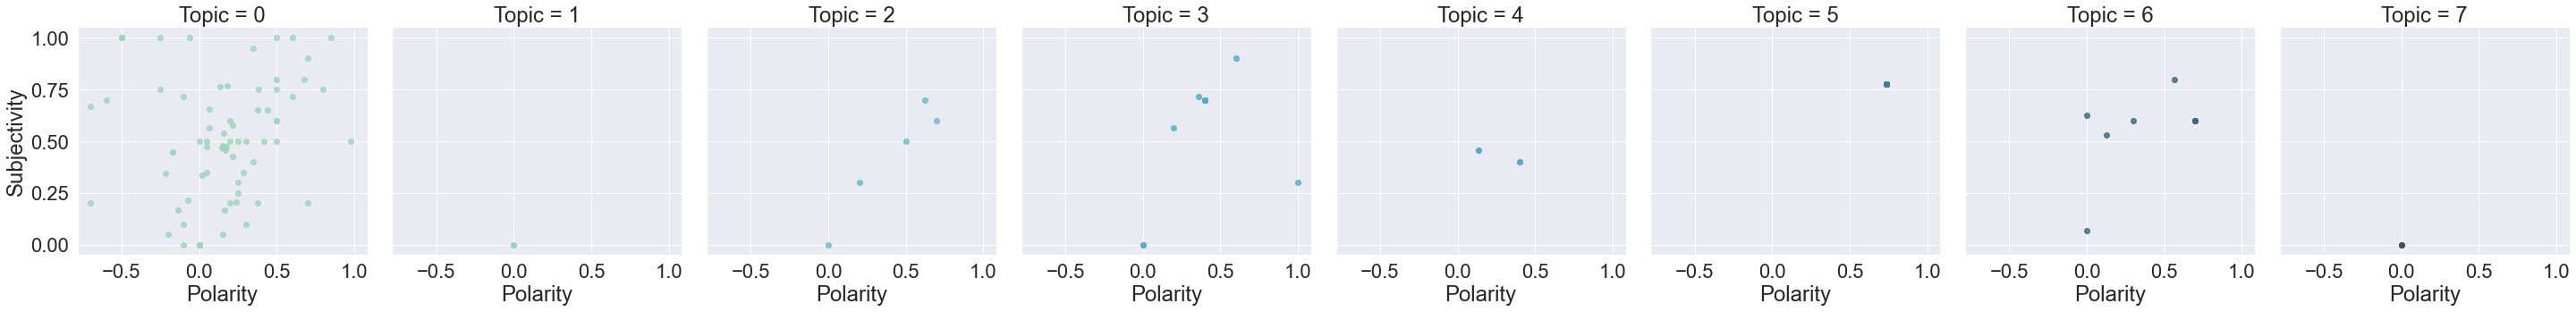

In [277]:
import seaborn as sns


plt.figure(figsize=(40,25)) 

g=sns.lmplot(x="Polarity", y="Subjectivity", hue='Topic', data=tweets, fit_reg=False, legend=False,palette="GnBu_d", col='Topic', legend_out=True)
 
# # Move the legend to an empty part of the plot
# plt.legend(loc='lower right')
 
plt.show()

In [278]:
tweets_2= tweets_1.groupby(['Topic'])['Analysis_Polarity'].value_counts().unstack('Topic').transpose()

tweets_2

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive
Topic,,,
0,18.0,37.0,48.0
1,NaN,1.0,NaN
2,NaN,1.0,4.0
3,NaN,2.0,10.0
4,NaN,NaN,2.0
5,NaN,NaN,57.0
6,NaN,2.0,6.0
7,NaN,2.0,NaN


In [279]:
tweets_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8 entries, 0 to 7
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Negative  1 non-null      float64
 1   Neutral   6 non-null      float64
 2   Positive  6 non-null      float64
dtypes: float64(3)
memory usage: 256.0 bytes


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [280]:
tweets_2['Total'] = tweets_2.sum(axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [281]:
tweets_2.columns

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['Negative', 'Neutral', 'Positive', 'Total'], dtype='object', name='Analysis_Polarity')

In [282]:
for i in tweets_2:
    tweets_2[i] = round(tweets_2[i]*100/tweets_2.Total)

tweets_2

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Analysis_Polarity,Negative,Neutral,Positive,Total
Topic,,,,
0,17.0,36.0,47.0,100.0
1,NaN,100.0,NaN,100.0
2,NaN,20.0,80.0,100.0
3,NaN,17.0,83.0,100.0
4,NaN,NaN,100.0,100.0
5,NaN,NaN,100.0,100.0
6,NaN,25.0,75.0,100.0
7,NaN,100.0,NaN,100.0


In [283]:
tweets_2=tweets_2.fillna(0)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [285]:
#Conduct Polarity Topic Analysis using Tableau

tweets_2.to_excel("Polarity_Topic Modeling.xlsx")

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [286]:
tweets_2= tweets_2.drop(['Total'], axis=1)

C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


C:\Users\athoi\anaconda3\lib\site-packages\ipykernel\ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


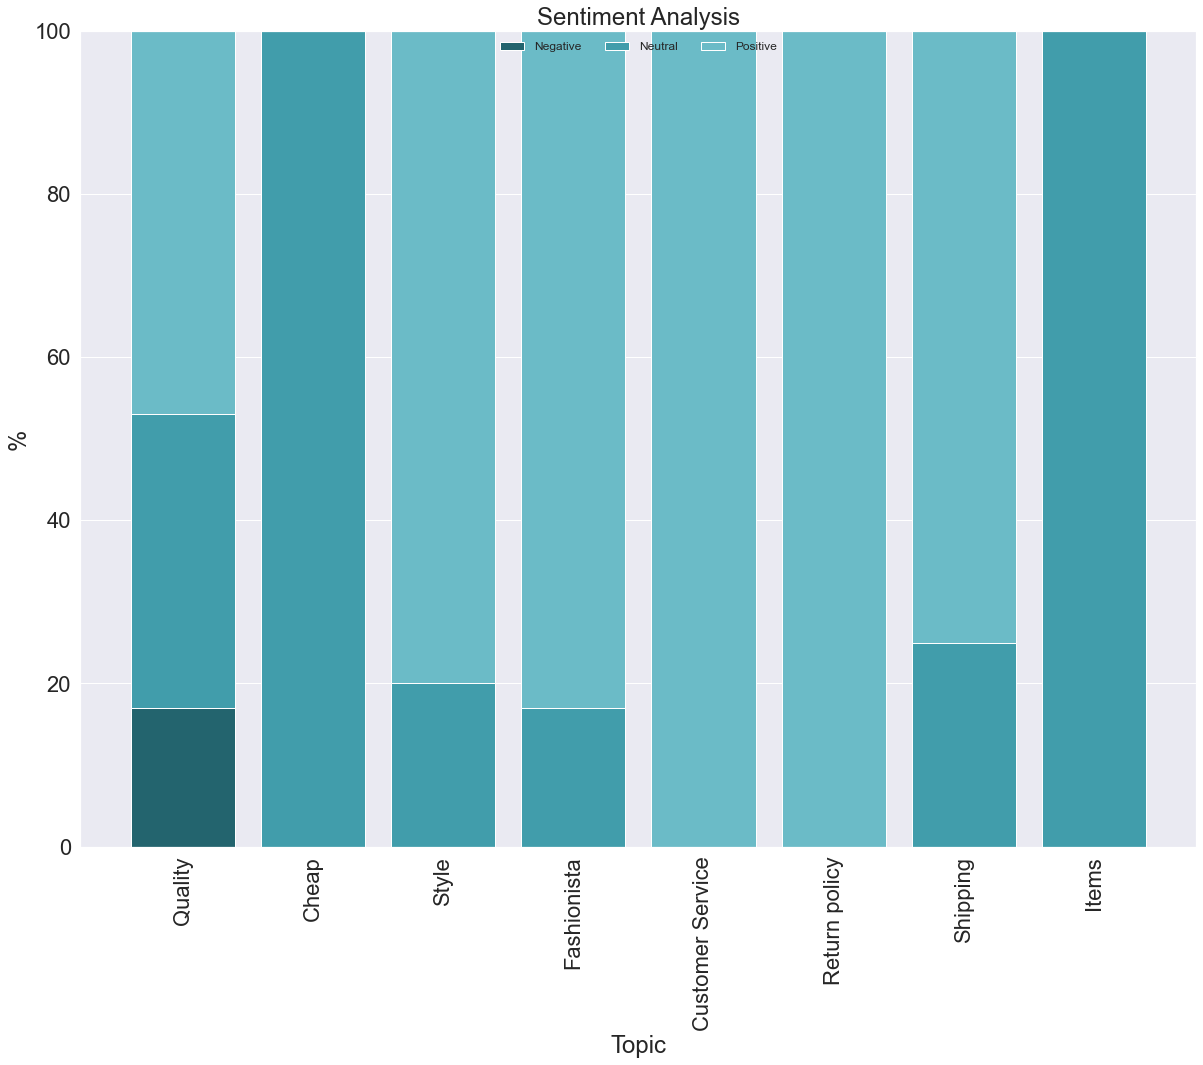

In [287]:
#Plotting and visualizing the counts
plt.figure(figsize=(20,15)) 


topic = ['Quality','Cheap','Style','Fashionista','Customer Service','Return policy','Shipping','Items']
sentiment = ['Negative', 'Neutral', 'Positive']
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('%')
p1=plt.bar(topic,tweets_2['Negative'], color='#23646e')
p2=plt.bar(topic,tweets_2['Neutral'], color='#419dab', bottom=tweets_2['Negative'])
p3=plt.bar(topic,tweets_2['Positive'], color='#6bbbc7', bottom=tweets_2['Neutral']+tweets_2['Negative'])
plt.xticks(topic, rotation=90)
plt.xlabel("Topic")
plt.legend((p1[0], p2[0], p3[0]),('Negative', 'Neutral', 'Positive'),fontsize=12, ncol=4, framealpha=0, fancybox=True, loc='upper center')

plt.show()
